In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"https://raw.githubusercontent.com/meleshko-anastasiia/DZ/refs/heads/main/marketing_AB.csv")
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [5]:
df.drop(columns = ['Unnamed: 0', 'user id'], inplace = True)
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


In [6]:
df.head(10)

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
5,ad,False,734,Saturday,10
6,ad,False,264,Wednesday,13
7,ad,False,17,Sunday,18
8,ad,False,21,Tuesday,19
9,ad,False,142,Monday,14


In [7]:
df.shape

(588101, 5)

In [8]:
df.dtypes

test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [9]:
df.isna().sum()

test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total ads,588101.0,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


In [12]:
print("Test Group:", df['test group'].unique())
print("Most Ads Day:", df['most ads day'].unique())
print("Converted:", df['converted'].unique())

Test Group: ['ad' 'psa']
Most Ads Day: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
Converted: [False  True]


In [13]:
df['converted'] = df['converted'].astype(int)
df.dtypes

test group       object
converted         int32
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [ ]:
# Статистические тесты

In [14]:
control_group = df[df['test group'] == 'psa']
test_group = df[df['test group'] == 'ad']

t_stat, p_val = stats.ttest_ind(test_group['converted'], control_group['converted'])
print(f"Test Group Analysis - T-statistic: {t_stat}, P-value: {p_val}")

Test Group Analysis - T-statistic: 7.37040597428566, P-value: 1.7033052627831264e-13


In [27]:
if p_val < 0.05:
    print("Отвергнем нулевую гипотезу: существует значительная разница в показателях конверсии между группами 'ad' и 'psa'.")
else:
    print("Не удается отвергнуть нулевую гипотезу: нет существенной разницы в показателях конверсии между группами 'ad' и 'psa'.")

Отвергнем нулевую гипотезу: существует значительная разница в показателях конверсии между группами 'ad' и 'psa'.


In [16]:
# Большинство за день
anova_result_day = stats.f_oneway(
    df[df['most ads day'] == 'Monday']['converted'],
    df[df['most ads day'] == 'Tuesday']['converted'],
    df[df['most ads day'] == 'Wednesday']['converted'],
    df[df['most ads day'] == 'Thursday']['converted'],
    df[df['most ads day'] == 'Friday']['converted'],
    df[df['most ads day'] == 'Saturday']['converted'],
    df[df['most ads day'] == 'Sunday']['converted']
)
print(f"Most Ads Day Analysis - F-statistic: {anova_result_day.statistic}, P-value: {anova_result_day.pvalue}")

Most Ads Day Analysis - F-statistic: 68.38818386898062, P-value: 1.8032007655359558e-85


In [36]:
if anova_result_day.pvalue < 0.05:
    print("Отвергнем нулевую гипотезу: день, в который было просмотрено больше всего объявлений, существенно влияет на коэффициент конверсии.")
else:
    print("Не стоит отвергать нулевую гипотезу: день, в который было просмотрено больше всего объявлений, существенно не влияет на коэффициент конверсии.")

Отвергнем нулевую гипотезу: день, в который было просмотрено больше всего объявлений, существенно влияет на коэффициент конверсии.


In [18]:
# Анализ большинства рекламных объявлений за час
anova_result_hour = stats.f_oneway(
    df[df['most ads hour'] == 0]['converted'],
    df[df['most ads hour'] == 1]['converted'],
    df[df['most ads hour'] == 2]['converted'],
    df[df['most ads hour'] == 3]['converted'],
    df[df['most ads hour'] == 4]['converted'],
    df[df['most ads hour'] == 5]['converted'],
    df[df['most ads hour'] == 6]['converted'],
    df[df['most ads hour'] == 7]['converted'],
    df[df['most ads hour'] == 8]['converted'],
    df[df['most ads hour'] == 9]['converted'],
    df[df['most ads hour'] == 10]['converted'],
    df[df['most ads hour'] == 11]['converted'],
    df[df['most ads hour'] == 12]['converted'],
    df[df['most ads hour'] == 13]['converted'],
    df[df['most ads hour'] == 14]['converted'],
    df[df['most ads hour'] == 15]['converted'],
    df[df['most ads hour'] == 16]['converted'],
    df[df['most ads hour'] == 17]['converted'],
    df[df['most ads hour'] == 18]['converted'],
    df[df['most ads hour'] == 19]['converted'],
    df[df['most ads hour'] == 20]['converted'],
    df[df['most ads hour'] == 21]['converted'],
    df[df['most ads hour'] == 22]['converted'],
    df[df['most ads hour'] == 23]['converted']
)
print(f"Most Ads Hour Analysis - F-statistic: {anova_result_hour.statistic}, P-value: {anova_result_hour.pvalue}")

Most Ads Hour Analysis - F-statistic: 18.742037312974496, P-value: 7.482025334833055e-77


In [28]:
if anova_result_hour.pvalue < 0.05:
    print("Анализ часов показа большинства объявлений опровергает нулевую гипотезу: час, в течение которого было просмотрено больше всего объявлений, существенно влияет на коэффициент конверсии.")
else:
    print("Не стоит отвергать нулевую гипотезу: час, в течение которого просматривается больше всего рекламы, существенно не влияет на коэффициент конверсии.")

Анализ часов показа большинства объявлений опровергает нулевую гипотезу: час, в течение которого было просмотрено больше всего объявлений, существенно влияет на коэффициент конверсии.


In [20]:
# Полный анализ рекламы
df_subset = df[df['total ads'] < 50].copy()


#создать ячейки для total_ads
# Создать ячейки для total_ads, используя .loc
df_subset.loc[:, 'total_ads_bin'] = pd.cut(df_subset['total ads'], bins=[-1, 1, 5, 10, 20, 30, 40, 50], labels=['0-1', '2-5', '6-10', '11-20', '21-30', '31-40', '41-50'])

#выполнить ANOVA для сгруппированных данных
anova_result_bin = stats.f_oneway(
    df_subset[df_subset['total_ads_bin'] == '0-1']['converted'],
    df_subset[df_subset['total_ads_bin'] == '2-5']['converted'],
    df_subset[df_subset['total_ads_bin'] == '6-10']['converted'],
    df_subset[df_subset['total_ads_bin'] == '11-20']['converted'],
    df_subset[df_subset['total_ads_bin'] == '21-30']['converted'],
    df_subset[df_subset['total_ads_bin'] == '31-40']['converted'],
    df_subset[df_subset['total_ads_bin'] == '41-50']['converted']
)

print(f"Total Ads (Binned) Analysis - F-statistic: {anova_result_bin.statistic}, P-value: {anova_result_bin.pvalue}")

Total Ads (Binned) Analysis - F-statistic: 1245.6689124986833, P-value: 0.0


In [37]:
if anova_result_bin.pvalue < 0.05:
    print("Отвергнем нулевую гипотезу: существует существенная разница в показателях конверсии между различными уровнями общего количества просмотренных объявлений (в бинах).")
else:
    print("Не удается отвергнуть нулевую гипотезу: количество просмотренных рекламных объявлений существенно не влияет на коэффициент конверсии.")

Отвергнем нулевую гипотезу: существует существенная разница в показателях конверсии между различными уровнями общего количества просмотренных объявлений (в бинах).


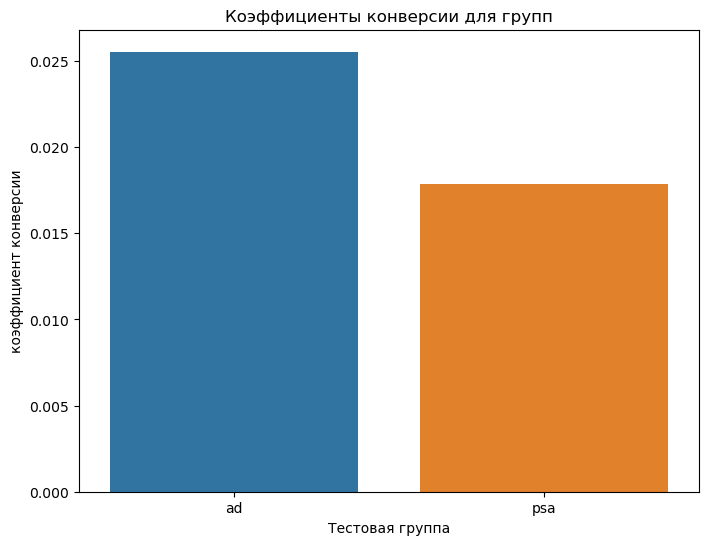

In [38]:
#коэффициенты конверсии для тестовой группы
conversion_rates = df.groupby('test group')['converted'].mean().reset_index()
conversion_rates.columns = ['Test Group', 'Conversion Rate']
plt.figure(figsize=(8, 6))
sns.barplot(x='Test Group', y='Conversion Rate', data=conversion_rates)
plt.title('Коэффициенты конверсии для групп')
plt.xlabel('Тестовая группа')
plt.ylabel('коэффициент конверсии')
plt.show()

In [41]:
#1.Основная задача – проанализировать группы клиентов и ответить на вопрос, какой тип рекламы был успешнее
# Вывод: AD успешнее чем PSA.

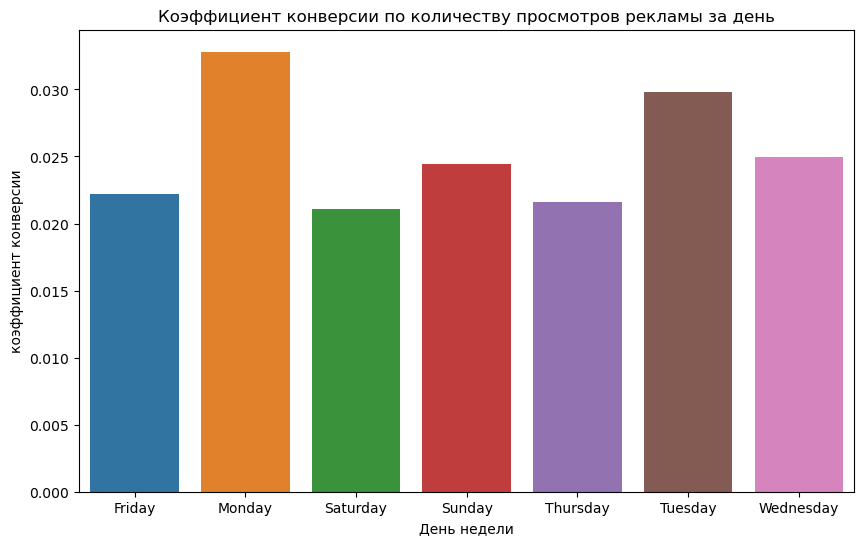

In [65]:
day_conversion_rate = df.groupby('most ads day')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=day_conversion_rate, x='most ads day', y='converted')
plt.title('Коэффициент конверсии по количеству просмотров рекламы за день')
plt.xlabel('День недели')
plt.ylabel('коэффициент конверсии')
plt.show()

In [ ]:
# Вывод:Коэфициент конверсии больше в понедельник и вторник, а в субботу и четверг реклама менее эффективна

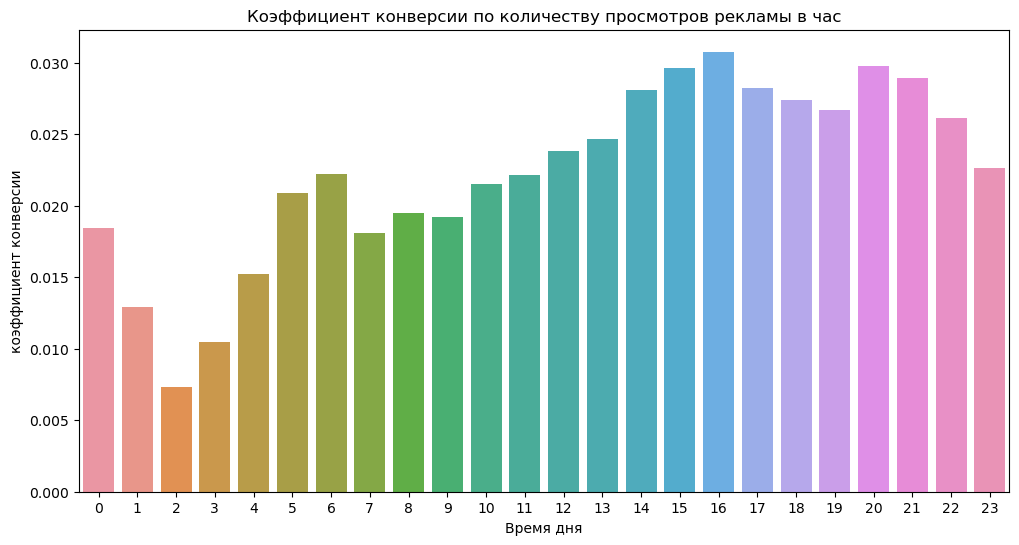

In [106]:
#коэффициент конверсии по большинству рекламных объявлений в час
hour_conversion_rate = df.groupby('most ads hour')['converted'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=hour_conversion_rate, x='most ads hour', y='converted')
plt.title('Коэффициент конверсии по количеству просмотров рекламы в час')
plt.xlabel('Время дня')
plt.ylabel('коэффициент конверсии')
plt.show()

In [ ]:
# Вывод: :Коэфициент конверсии больше всего в 16:00, а в 2 часа реклама менее эффективна

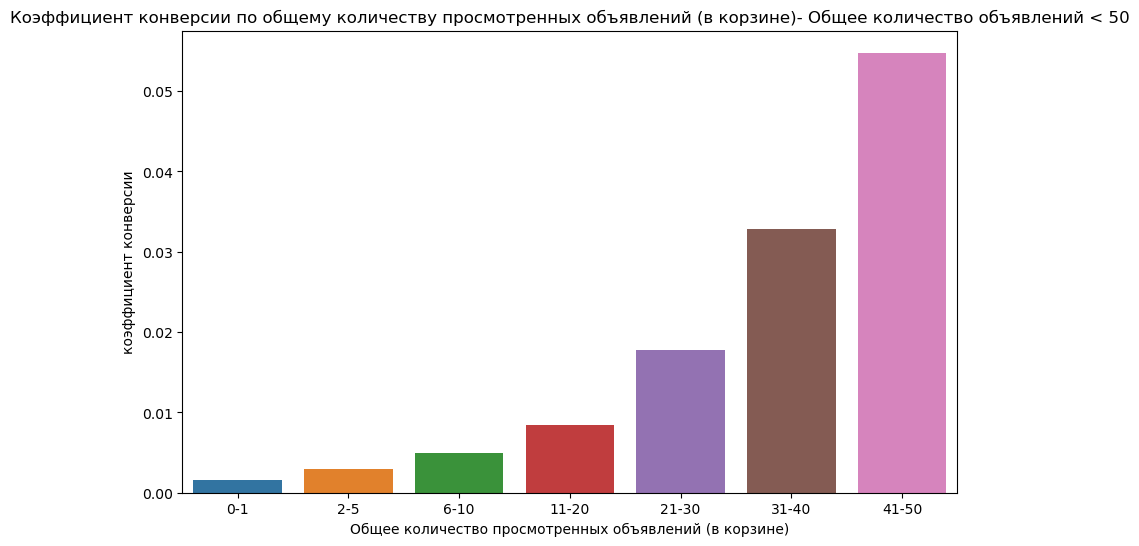

In [102]:
#коэффициент конверсии по общему количеству объявлений
ads_conversion_rate_bin = df_subset.groupby('total_ads_bin')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=ads_conversion_rate_bin, x='total_ads_bin', y='converted')
plt.title('Коэффициент конверсии по общему количеству просмотренных объявлений (в корзине)- Общее количество объявлений < 50')
plt.xlabel('Общее количество просмотренных объявлений (в корзине)')
plt.ylabel('коэффициент конверсии')
plt.show()

In [ ]:
# коэффициент конверсии по общему количеству объявлений большую эффективность составляет в значениях 41-50